In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# 1. 예제 데이터 생성
X, y = make_classification(
    n_samples=200,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    random_state=42
)

feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [9]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-0.346347,0.615105,-1.599136,-0.025077,-1.835385,-0.071393,-0.079900,-0.088343,2.149471,-0.406723,1
1,1.353891,-2.552883,0.569950,-0.838090,-1.517482,0.915475,0.464008,0.635397,-0.537256,0.721466,0
2,0.136336,2.473938,2.155743,-0.054096,-1.777367,-1.255051,-1.211360,0.836324,5.026974,-1.131453,1
3,-1.471314,-1.610811,1.811375,-1.426168,-0.222879,-1.767294,1.903552,0.328652,-1.092684,0.623549,0
4,0.767585,0.107784,-0.353016,-1.634055,-3.142936,-1.774286,-0.370667,1.313069,4.881878,-1.036576,1
...,...,...,...,...,...,...,...,...,...,...,...
195,-0.034655,-0.386502,-1.327918,1.108935,-0.815847,0.465122,1.095427,1.157815,1.228087,0.680265,1
196,-0.886902,-0.066692,-1.947884,-0.519899,0.184152,-1.116025,0.662571,0.147699,-0.110666,0.579443,0
197,0.213627,2.742986,-0.255252,0.017187,1.599088,1.130206,-3.225061,-0.266915,-1.599701,0.032724,1
198,1.051754,-0.435951,0.063688,-1.404885,-0.217369,-0.213422,-1.147434,0.139215,-0.245550,0.471961,0


In [10]:
def plot_all_feature_distribution(df, feature_names, target_col='target'):  #각 특성의 분포를 타깃 변수별로 시각화
    n_features = len(feature_names)      # 플롯 배열 설정
    n_cols =3 
    n_rows = (n_features + n_cols -1)// n_cols
    
    plt.figure(figsize=(5*n_cols, 4*n_rows))    # 플롯 레이아웃 설정
    for i, feature in enumerate(feature_names): # 특성별 분포 플롯
        plt.subplot(n_rows, n_cols, i+1)
        sns.kdeplot(data=df, x=feature, hue = target_col, fill=True, common_norm=False, alpha=0.5)
        plt.title(f'{feature} by target')
    plt.suptitle('피처별 분포')             # 전체 타이틀과 레이아웃 설정
    plt.tight_layout()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11852\876374489.py:12: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_11852\876374489.py:12: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_11852\876374489.py:12: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_11852\876374489.py:12: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_11852\876374489.py:12: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from fon

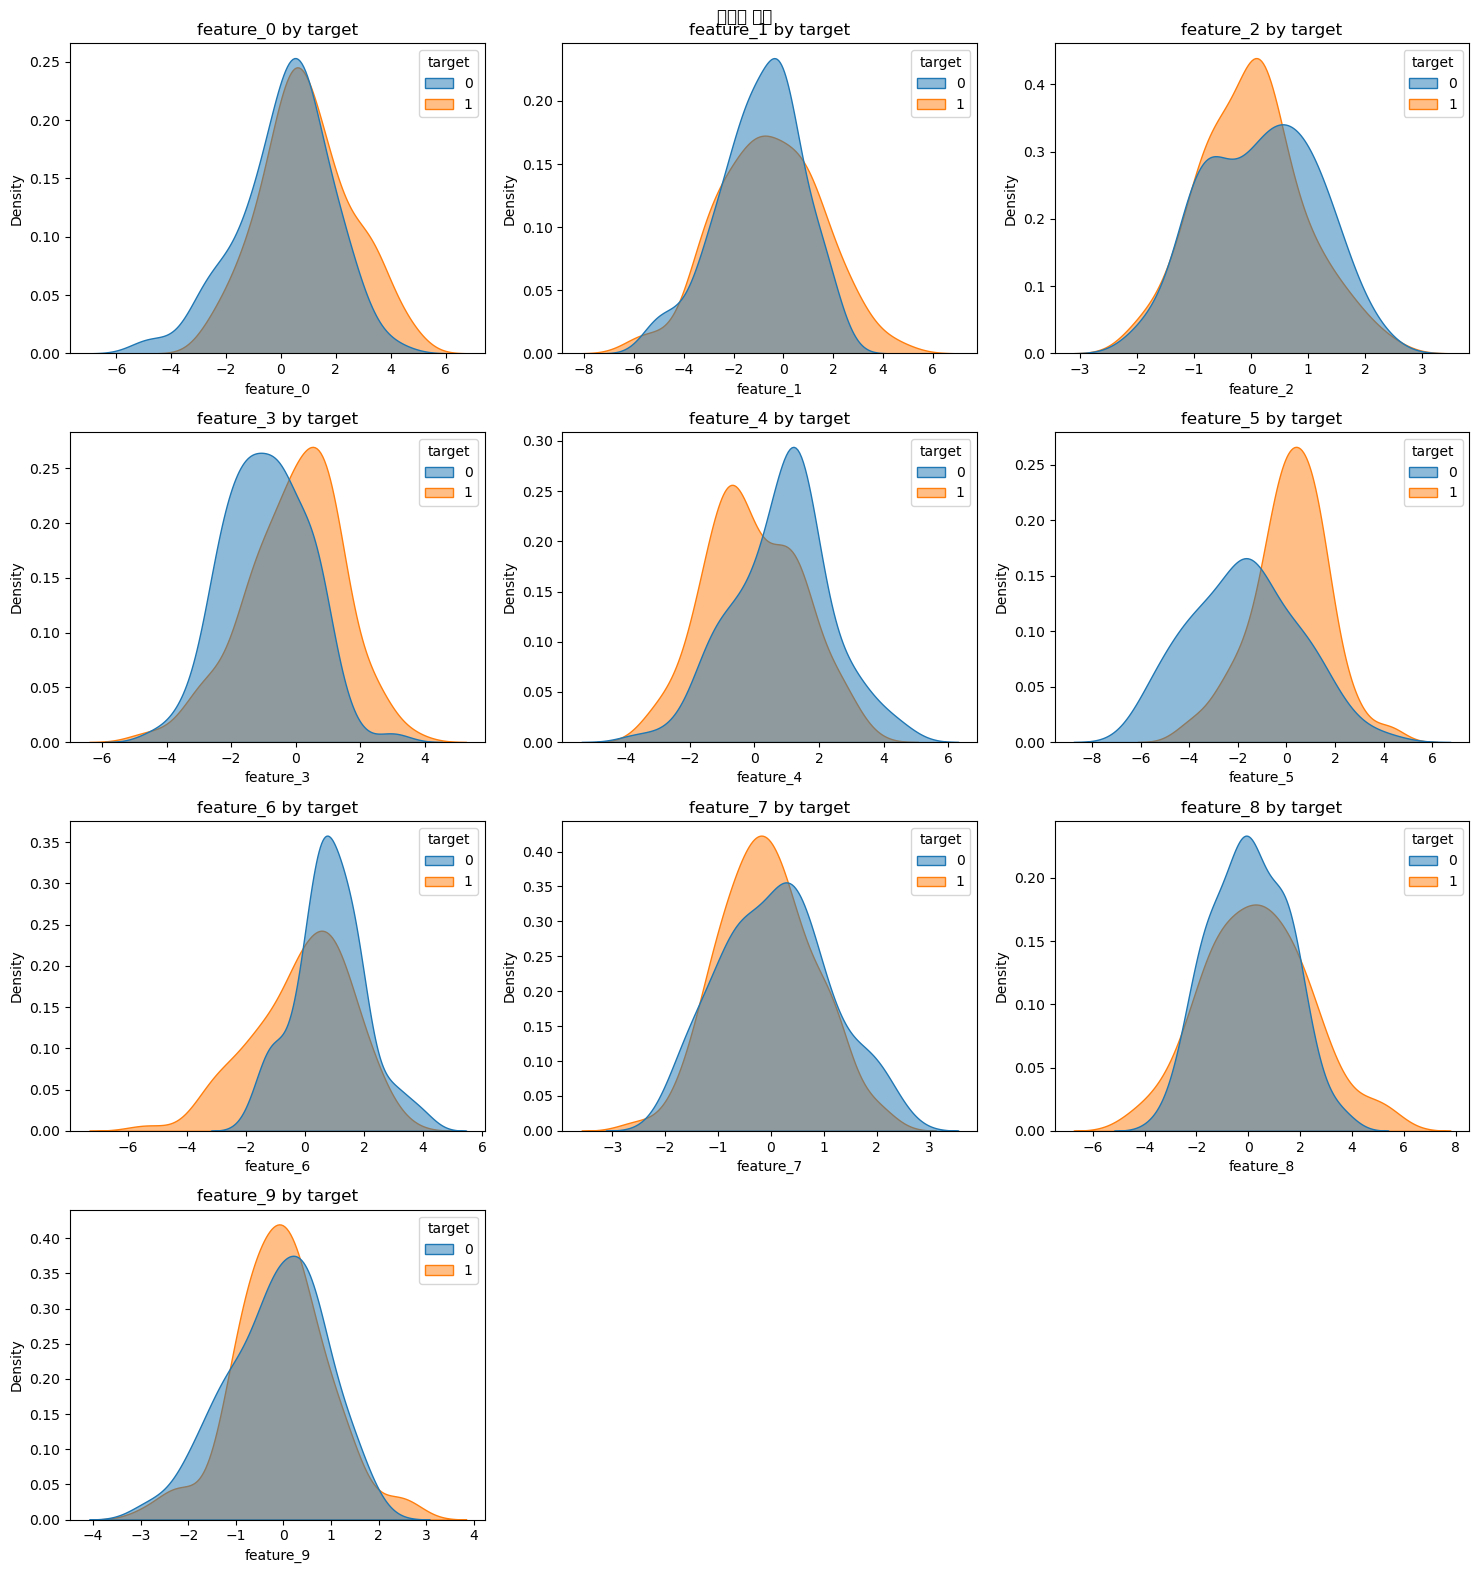

In [12]:
plot_all_feature_distribution(df, feature_names)

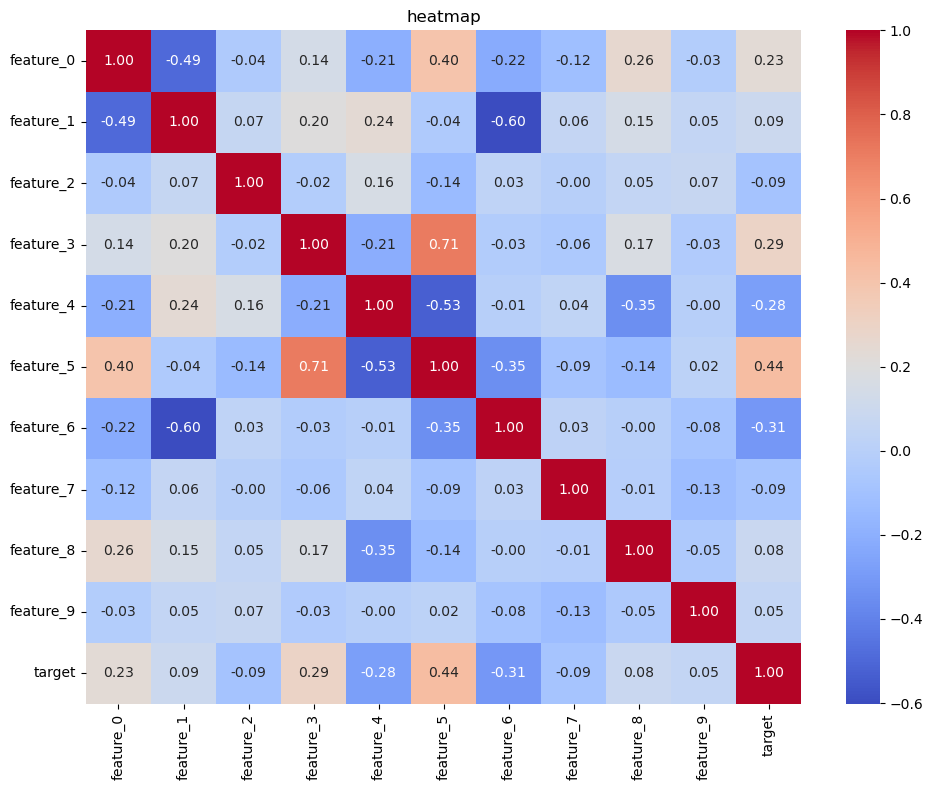

In [14]:
## 상관계수 히트맵 시각화

def plot_correlation_heatmap(df, title='heatmap'):
    plt.figure(figsize=(10,8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")
    plt.title(title)
    plt.tight_layout()
    plt.show()
plot_correlation_heatmap(df)

In [15]:
## 피처 스케일링이 필요하다
## chi2 양수만 가능하다.

#MinMaxScaler를 사용하여 모든 특성 값을 0과 1 사이로 변환
X_scaled = MinMaxScaler().fit_transform(X)  

# Mutual Information (MI) 점수 계산
mi_selector =SelectKBest(score_func=mutual_info_classif, k='all')  # Mutual Information은 비선형 관계를 탐지할 수 있는 점수
mi_selector.fit(X,y)                                               # 비대칭적 관계도 감지, 복잡한 패턴에유용
mi_scores = mi_selector.scores_                # SelectKBest로 모든 특성의 MI 점수를 계산,  0 이상 (높을수록 타깃과 강한 연관성)
 

##chi-squared 점수 계산
chi2_selector =SelectKBest(score_func=chi2, k='all')   # 카이제곱 검정을 사용하여 타깃과 특성 간의 독립성 여부를 평가
chi2_selector.fit(X_scaled,y)          # X_scaled를 사용한 이유: Chi-squared는 음수 값이 들어가면 오류가 발생. - 0과 1로 정규화된 데이터를 사용
chi2_scores = chi2_selector.scores_    # 0 이상 (높을수록 강한 범주형 독립성, 연관성), 타깃 변수가 범주형(이산형 변환-OneHot)일 때 주로 사용


## 테이블 정리
score_df =pd.DataFrame({                     # MI 점수를 기준으로 내림차순 정렬하여 가장 중요한 특성을 위로 배치
    'Feature':feature_names,
    'Mi_score':mi_scores,
    'Chi2_score':chi2_scores
}).sort_values(by='Mi_score', ascending=False)

# Mutual Information의 한계: 비선형성을 고려하지만, 점수가 상대적이어서 해석이 직관적이지 않
#상관계수 히트맵과 함께 사용하여 비교 분석 권장

# Chi-squared의 한계: 음수 데이터 불가: 반드시 MinMaxScaler로 정규화해야 함 
#선형적 특성 간 관계만 탐지하므로 비선형 특성 분석에는 부적합

In [16]:
# Mutual Information (MI) 상위 5개 특성 추출
mi_top5=score_df.sort_values(by='Mi_score', ascending=False).head(5)['Feature'].tolist()
# Chi-squared (Chi2) 상위 5개 특성 추출
chi2_top5=score_df.sort_values(by='Chi2_score', ascending=False).head(5)['Feature'].tolist()

In [17]:
chi2_top5

['feature_5', 'feature_4', 'feature_3', 'feature_6', 'feature_0']

In [18]:
mi_top5

['feature_6', 'feature_5', 'feature_3', 'feature_8', 'feature_4']

In [19]:
# 상위 중요 특성의 분포를 시각화

def plot_feature_distribution(features, method_name):         #함수 정의
    plt.figure(figsize=(15,8))                                #전체 그래프 레이아웃 설정
    for i, feature in enumerate(features):
        plt.subplot(2,3,i+1)                                  # 반복문으로 각 특성을 순회하여 서브플롯을 생성
        sns.kdeplot(data=df, x=feature, hue='target', fill=True, alpha=0.5)
        plt.title(f'{feature} by target')
    plt.suptitle(f'{method_name} & feature')           # 전체 타이틀과 레이아웃 조정
    plt.tight_layout()
    plt.show()

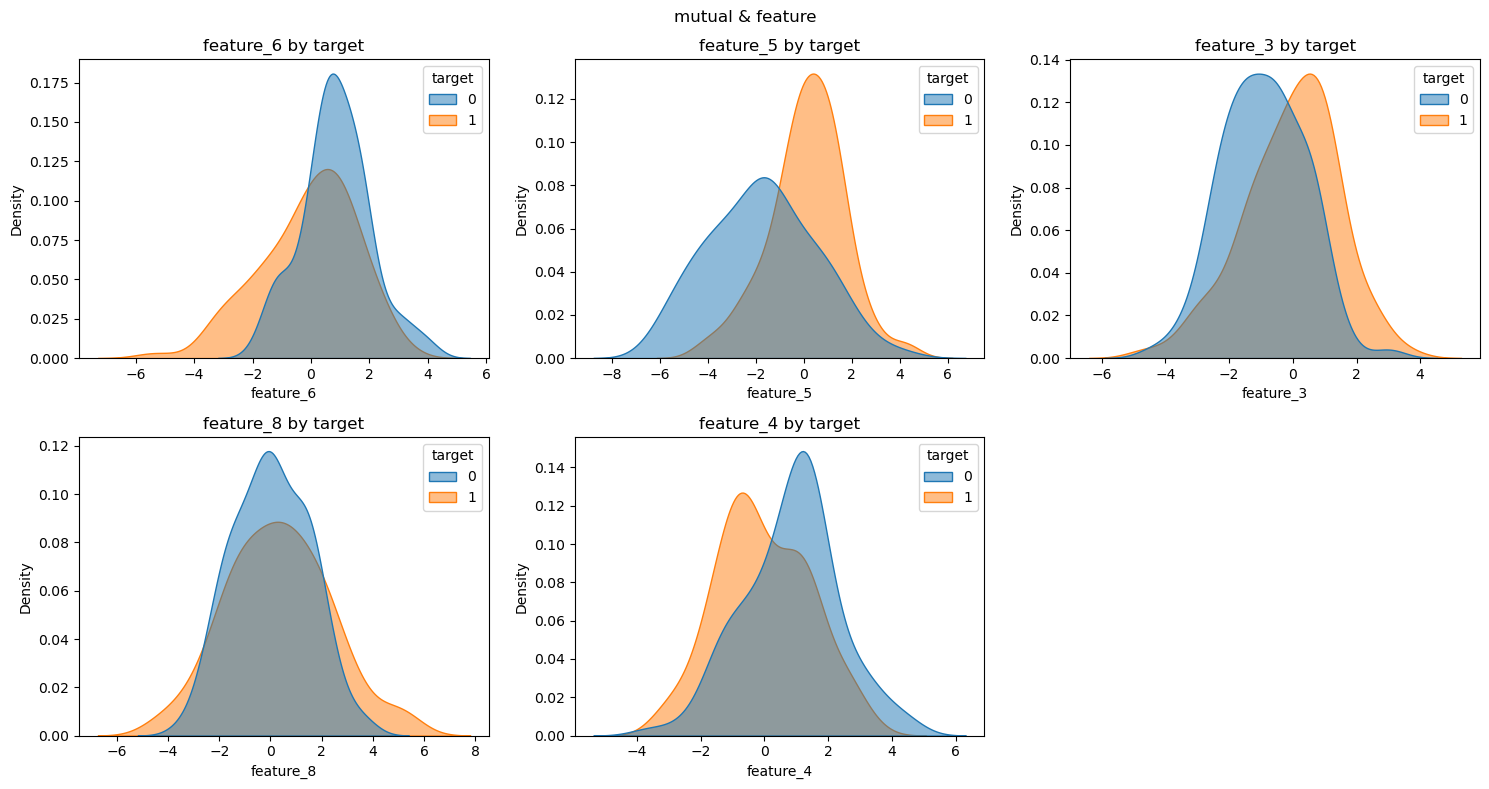

In [20]:
plot_feature_distribution(mi_top5,'mutual')

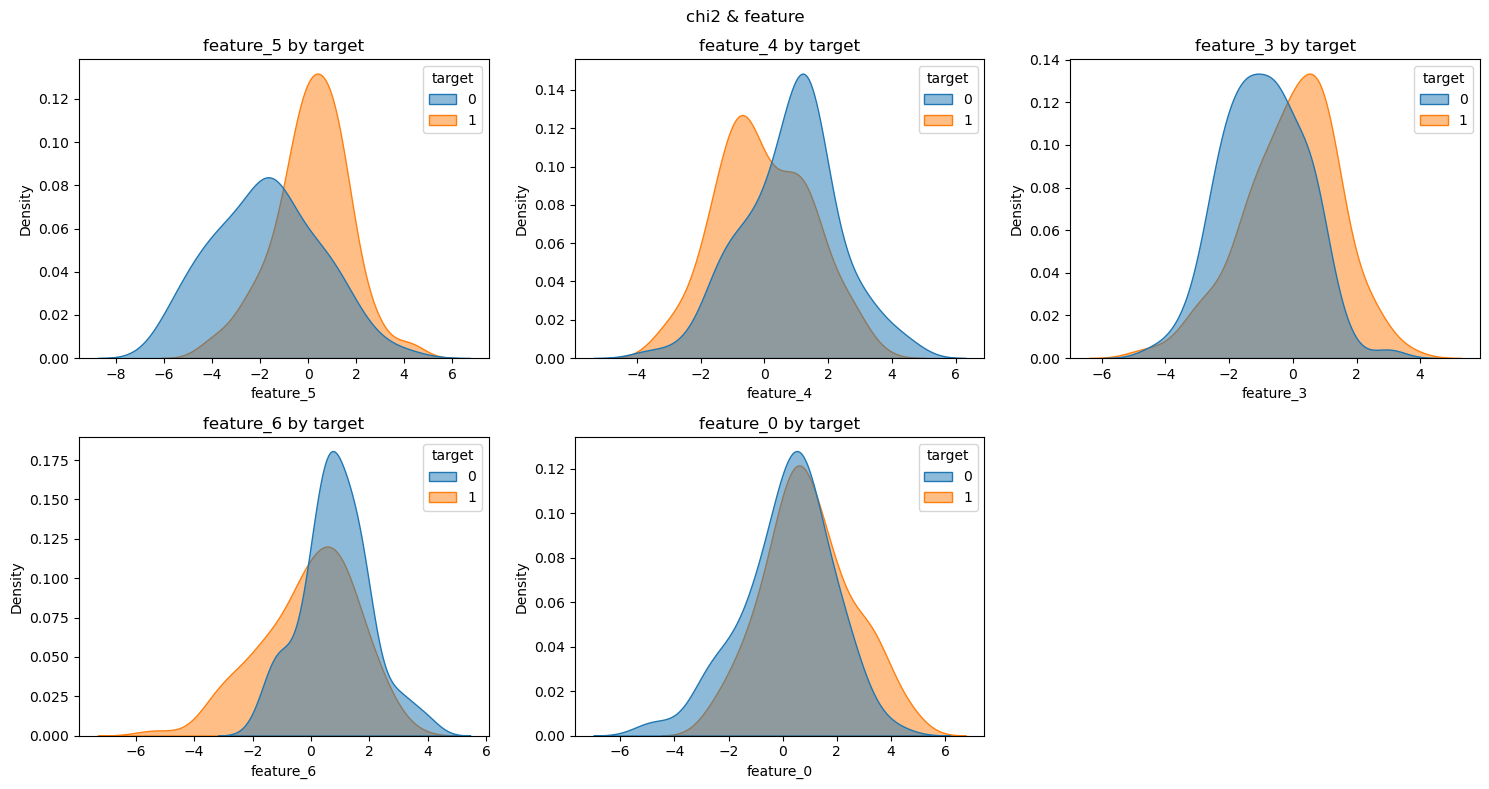

In [21]:
plot_feature_distribution(chi2_top5,'chi2')

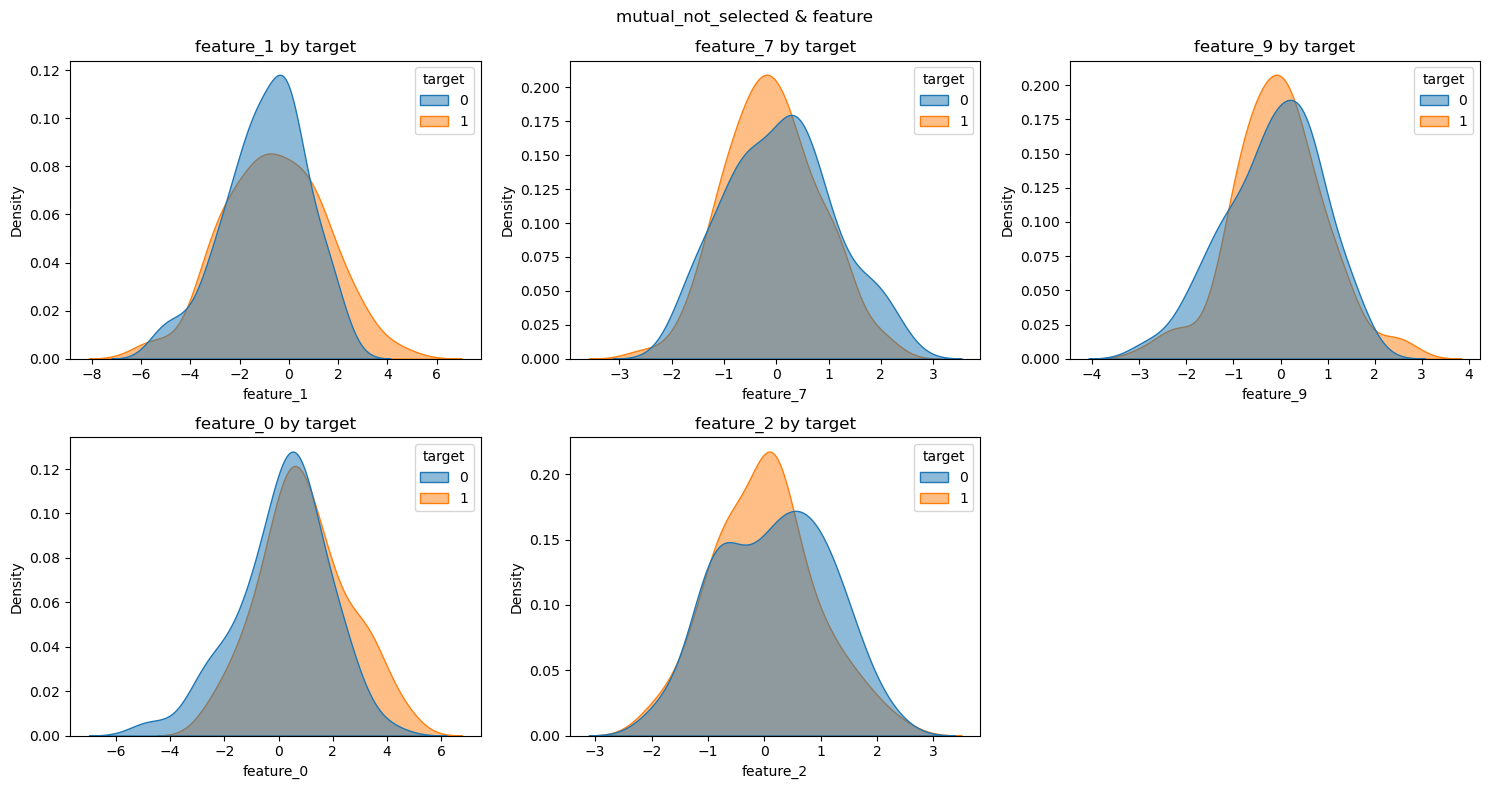

In [22]:
## 선택 안 된 것들 

mi_not_selected=list(set(feature_names)- set(mi_top5))
chi2_not_selected=list(set(feature_names)- set(chi2_top5))

plot_feature_distribution(mi_not_selected,'mutual_not_selected')

# 성능평가

In [23]:
#로지스틱 회귀 모델을 사용하여 특성 중요도 평가

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 스케일링을 진행했으니 스케일된 데이터로 일단 로지스틱 진행
X_train, X_test, y_train, y_test =train_test_split(X_scaled, y, test_size=0.3, random_state=111)

#전체 특성(10개)을 사용하여 모델 학습
clf_all=LogisticRegression()
clf_all.fit(X_train, y_train)
y_pred_all=clf_all.predict(X_test)
acc_all=accuracy_score(y_test, y_pred_all)

In [24]:
print(f'전체 특성 사용 정확도: {acc_all:.2f}')

전체 특성 사용 정확도: 0.77


In [25]:
## 선택된 MI 피처만 사용
mi_idx=[feature_names.index(f) for f in mi_top5]  # MI 점수를 기준으로 상위 5개 특성 이름 리스트
X_train_mi=X_train[:,mi_idx]         # MI 상위 특성의 인덱스 번호를 가져옴
X_test_mi=X_test[:,mi_idx]           # 인덱스를 활용하여 상위 5개 특성만 추출

## 선택된 MI로 학습
clf_mi=LogisticRegression()         # MI 상위 5개 특성만 사용하여 모델 학습
clf_mi.fit(X_train_mi, y_train)
y_pred_mi=clf_mi.predict(X_test_mi)
acc_mi=accuracy_score(y_test, y_pred_mi)

In [26]:
print(f'MI 상위 특성 사용 정확도: {acc_mi:.2f}')

MI 상위 특성 사용 정확도: 0.75


In [27]:
## 선택되지 않은 MI로만 진행

mi_not_idx=[feature_names.index(f) for f in mi_not_selected] 
X_train_mi_not=X_train[:,mi_not_idx]
X_test_mi_not=X_test[:,mi_not_idx]

## 선택되지 않은 MI로 학습
clf_mi_not=LogisticRegression()
clf_mi_not.fit(X_train_mi_not, y_train)
y_pred_mi_not=clf_mi_not.predict(X_test_mi_not)
acc_mi_not=accuracy_score(y_test, y_pred_mi_not)

In [28]:
print(f'MI 비선택 특성 사용 정확도: {acc_mi_not:.2f}')

MI 비선택 특성 사용 정확도: 0.57


# VarianceThreshold
분산이 어떤 값 이하면 피처를 제거한다. 기본값은 0.0, 분산이 0인 피처를 제거하는 것
원핫 인코딩 했을 때
데이터가 0이 엄청 많다. 대부분 0이거나
데이터가 0이 엄청 많고 1이 몇 개 없다. (거의 변하지 않는 컬럼은 예측에 도움이 되지 않음.)
분산이 거의 없다. (분산이 거의 없는 이러한 특성은 제거하는 것이 모델 성능 향상에 도움)
이런 놈들은 날려라!

In [29]:
# VarianceThreshold는 특성 선택(Feature Selection) 기법 중 하나로, 분산(Variance)이 일정 기준 이하인 특성을 제거하는 데 사용
# 분산이 0인 특성을 제거 (분산이 0이라는 것은 모든 샘플의 값이 동일)

In [30]:
#분산(Variance)이 0인 특성을 제거하여 정보가 없는 특성을 제거
#VarianceThreshold를 사용하여 중복 정보 또는 불필요한 특성을 자동으로 필터링.

import numpy as np
from sklearn.feature_selection import VarianceThreshold

# 샘플 데이터 (4개의 특성, 5개의 샘플)
X = np.array([
    [0, 2, 0, 3],
    [0, 1, 4, 3],
    [0, 1, 1, 3],
    [0, 1, 0, 3],
    [0, 1, 3, 3]
])

# 분산 기준(threshold)보다 낮은 특성 제거
selector = VarianceThreshold(threshold=0.0)  # 0.0이면 분산이 0인 특성만 제거 (분산 임계값 설정)
X_selected = selector.fit_transform(X)  #데이터를 학습하고, 분산이 0인 특성을 제거하여 반환

print("원본 shape:", X.shape)
print("선택된 shape:", X_selected.shape)
print("선택된 데이터:\n", X_selected)
print("선택된 feature index:", selector.get_support(indices=True))

원본 shape: (5, 4)
선택된 shape: (5, 2)
선택된 데이터:
 [[2 0]
 [1 4]
 [1 1]
 [1 0]
 [1 3]]
선택된 feature index: [1 2]


In [31]:
from sklearn.datasets import load_iris

# 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

# 분산 기준 0.2 이상만 유지
selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

print("원본 shape:", X.shape)
print("선택된 shape:", X_selected.shape)
print("선택된 feature index:", selector.get_support(indices=True))

원본 shape: (150, 4)
선택된 shape: (150, 3)
선택된 feature index: [0 2 3]


In [32]:
# 데이터프레임으로 변환하여 분산 확인
df = pd.DataFrame(X, columns=iris.feature_names)
print("특성별 분산:\n", df.var())

특성별 분산:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


# VarianceThreshold 활용 상황

데이터 전처리 후: 원핫 인코딩 후 분산이 0인 특성을 제거할 때

정보량이 적은 특성 필터링: 분산이 매우 작은 특성은 타깃과의 관계가 거의 없을 가능성이 큼

고차원 데이터 처리: 특성 수가 많을 때, 불필요한 특성을 줄여 모델 복잡성을 낮춤

# 필수과제 1
- 전체가 0.77 수준인데 -> 5개 Mi 피처 셀렉션을 했을 때 0.75였다. 여기서 + 피처를 더 추가하면 개선될 수 있다.
- 선택되지 않은 피처들 중에서 어떤 피처를 넣으면 더 성능이 올라갈 것인가!?
- 어떤 기준으로 피처를 추가 선택해야 할지?! - 선택되지 않은 피처 중에서
- 만약 가정( 저도 지금 만든 예제라서 정답을 모른다.)
- 1개 또는 2개 피처만 추가했을 때 원래 성능을 보여준다면 -> 피처 차원축소의 개념이 될 수 있다.
- 다 넣어야 원래 수준의 성능을 보여준다 -> 현재 피처로는 지금 전체가 설명이 가능한 것이고, 추가 피처가 더 필요할 수도 있다.

In [43]:
mi_not_selected=list(set(feature_names)- set(mi_top5))
chi2_not_selected=list(set(feature_names)- set(chi2_top5))

## 선택되지 않은 MI로만 진행

mi_not_idx=[feature_names.index(f) for f in mi_not_selected] 
X_train_mi_not=X_train[:,mi_not_idx]
X_test_mi_not=X_test[:,mi_not_idx]

## 선택되지 않은 MI로 학습
clf_mi_not=LogisticRegression()
clf_mi_not.fit(X_train_mi_not, y_train)
y_pred_mi_not=clf_mi_not.predict(X_test_mi_not)
acc_mi_not=accuracy_score(y_test, y_pred_mi_not)

In [44]:
print(f'MI 비선택 특성 사용 정확도: {acc_mi_not:.2f}')

MI 비선택 특성 사용 정확도: 0.57


In [45]:
#상관관계기반 특성 추가

In [46]:
df = pd.DataFrame(X_scaled, columns=feature_names)
df['target'] = y

# 타깃 변수와 각 특성 간의 상관계수 계산
correlations = df.corr()['target'].drop('target').abs().sort_values(ascending=False)
print("타깃 변수와 특성 간의 상관계수:\n", correlations)

타깃 변수와 특성 간의 상관계수:
 feature_5    0.441321
feature_6    0.310009
feature_3    0.293218
feature_4    0.282484
feature_0    0.233647
feature_1    0.093936
feature_2    0.092340
feature_7    0.087254
feature_8    0.080022
feature_9    0.051273
Name: target, dtype: float64


In [47]:
# MI로 선택되지 않은 특성 중 상관계수 순위
not_selected_corr = correlations.loc[mi_not_selected]
print("\nMI 미선택 특성 중 상관계수 순위:\n", not_selected_corr)


MI 미선택 특성 중 상관계수 순위:
 feature_1    0.093936
feature_7    0.087254
feature_9    0.051273
feature_0    0.233647
feature_2    0.092340
Name: target, dtype: float64


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

best_acc = acc_mi
best_features = mi_top5.copy()

# 상관계수 순위대로 하나씩 추가하여 성능 평가
for feature in not_selected_corr.index:
    # 현재 조합에 특성 추가
    mi_plus = mi_top5 + [feature]
    idx = [feature_names.index(f) for f in mi_plus]
    
    X_train_comb = X_train[:, idx]
    X_test_comb = X_test[:, idx]
    
    # 로지스틱 회귀 모델 학습 및 평가
    clf = LogisticRegression()
    clf.fit(X_train_comb, y_train)
    y_pred = clf.predict(X_test_comb)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"MI 상위 5개 + {feature} -> 정확도: {acc:.2f}")

MI 상위 5개 + feature_1 -> 정확도: 0.77
MI 상위 5개 + feature_7 -> 정확도: 0.77
MI 상위 5개 + feature_9 -> 정확도: 0.75
MI 상위 5개 + feature_0 -> 정확도: 0.75
MI 상위 5개 + feature_2 -> 정확도: 0.77


In [49]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# 데이터프레임으로 변환
df = pd.DataFrame(X_scaled, columns=feature_names)
df['target'] = y

# MI 상위 5개와 선택되지 않은 나머지 특성
mi_selected = mi_top5
mi_not_selected = list(set(feature_names) - set(mi_selected))

# 상관계수 계산
corr_matrix = pd.DataFrame(index=mi_selected, columns=mi_not_selected)

for mi_feat in mi_selected:
    for non_mi_feat in mi_not_selected:
        corr_value = df[mi_feat].corr(df[non_mi_feat])
        corr_matrix.loc[mi_feat, non_mi_feat] = round(corr_value, 3)

print("\n상관계수 행렬:")
print(corr_matrix)


상관계수 행렬:
          feature_1 feature_7 feature_9 feature_0 feature_2
feature_6    -0.602     0.027    -0.084    -0.223     0.031
feature_5    -0.042    -0.092      0.02     0.399    -0.142
feature_3     0.202    -0.058    -0.034     0.137    -0.023
feature_8     0.149    -0.011    -0.051      0.26     0.049
feature_4     0.239     0.039    -0.002    -0.206     0.161


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 추가할 특성 리스트
additional_features = ['feature_7', 'feature_2', 'feature_1']

# 최종 특성 리스트 (MI 상위 5개 + 추가 특성)
final_features = mi_top5 + additional_features
print("최종 사용 특성 목록:", final_features)

# 인덱스 찾기
idx = [feature_names.index(f) for f in final_features]

# 학습 데이터 구성
X_train_final = X_train[:, idx]
X_test_final = X_test[:, idx]

# 로지스틱 회귀 모델 학습
clf_final = LogisticRegression()
clf_final.fit(X_train_final, y_train)

# 예측 및 정확도 평가
y_pred_final = clf_final.predict(X_test_final)
acc_final = accuracy_score(y_test, y_pred_final)
print(f"MI 상위 5개 + feature_7 + feature_2 + feature_1 -> 정확도: {acc_final:.2f}")

최종 사용 특성 목록: ['feature_6', 'feature_5', 'feature_3', 'feature_8', 'feature_4', 'feature_7', 'feature_2', 'feature_1']
MI 상위 5개 + feature_7 + feature_2 + feature_1 -> 정확도: 0.77


In [51]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Chi-squared 점수 계산
X_scaled = MinMaxScaler().fit_transform(X)  # Chi2는 음수가 없도록 MinMaxScaler 사용
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_scaled, y)

# Chi-squared 점수 저장
chi2_scores = chi2_selector.scores_

# 상위 5개 특성 선택
score_df = pd.DataFrame({
    'Feature': feature_names,
    'Chi2_score': chi2_scores
}).sort_values(by='Chi2_score', ascending=False)

chi2_top5 = score_df.head(5)['Feature'].tolist()
chi2_not_selected = list(set(feature_names) - set(chi2_top5))

print("Chi2 상위 5개 특성:", chi2_top5)
print("선택되지 않은 Chi2 특성:", chi2_not_selected)

Chi2 상위 5개 특성: ['feature_5', 'feature_4', 'feature_3', 'feature_6', 'feature_0']
선택되지 않은 Chi2 특성: ['feature_1', 'feature_7', 'feature_9', 'feature_8', 'feature_2']


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## 스케일링을 진행했으니 스케일된 데이터로 일단 로지스틱 진행
X_train, X_test, y_train, y_test =train_test_split(X_scaled, y, test_size=0.3, random_state=111)

# Chi2 상위 5개 특성으로 모델 학습
chi2_idx = [feature_names.index(f) for f in chi2_top5]
X_train_chi2 = X_train[:, chi2_idx]
X_test_chi2 = X_test[:, chi2_idx]

clf_chi2 = LogisticRegression()
clf_chi2.fit(X_train_chi2, y_train)
y_pred_chi2 = clf_chi2.predict(X_test_chi2)

acc_chi2 = accuracy_score(y_test, y_pred_chi2)
print(f"Chi2 상위 5개 특성 -> 정확도: {acc_chi2:.2f}")

Chi2 상위 5개 특성 -> 정확도: 0.73


In [55]:
from itertools import combinations

# Chi2 상위 5개 + 추가 특성 실험
best_acc = acc_chi2
best_features = chi2_top5.copy()

# 상관관계 기반으로 비선택 특성 중 하나씩 추가
for feature in chi2_not_selected:
    chi2_plus = chi2_top5 + [feature]
    idx = [feature_names.index(f) for f in chi2_plus]
    
    X_train_comb = X_train[:, idx]
    X_test_comb = X_test[:, idx]
    
    clf = LogisticRegression()
    clf.fit(X_train_comb, y_train)
    y_pred = clf.predict(X_test_comb)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Chi2 상위 5개 + {feature} -> 정확도: {acc:.2f}")
    
    if acc > best_acc:
        best_acc = acc
        best_features = chi2_plus
        print(f" 성능 개선 -> 현재 최고 정확도: {best_acc:.2f}, 추가 특성: {feature}")

Chi2 상위 5개 + feature_1 -> 정확도: 0.77
 성능 개선 -> 현재 최고 정확도: 0.77, 추가 특성: feature_1
Chi2 상위 5개 + feature_7 -> 정확도: 0.73
Chi2 상위 5개 + feature_9 -> 정확도: 0.73
Chi2 상위 5개 + feature_8 -> 정확도: 0.75
Chi2 상위 5개 + feature_2 -> 정확도: 0.75


In [56]:
# 두 개 특성 조합 실험
for comb in combinations(chi2_not_selected, 2):
    chi2_plus = chi2_top5 + list(comb)
    idx = [feature_names.index(f) for f in chi2_plus]
    
    X_train_comb = X_train[:, idx]
    X_test_comb = X_test[:, idx]
    
    clf = LogisticRegression()
    clf.fit(X_train_comb, y_train)
    y_pred = clf.predict(X_test_comb)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Chi2 상위 5개 + {comb} -> 정확도: {acc:.2f}")
    
    if acc > best_acc:
        best_acc = acc
        best_features = chi2_plus
        print(f" 성능 개선 -> 현재 최고 정확도: {best_acc:.2f}, 추가 조합: {comb}")

Chi2 상위 5개 + ('feature_1', 'feature_7') -> 정확도: 0.75
Chi2 상위 5개 + ('feature_1', 'feature_9') -> 정확도: 0.77
Chi2 상위 5개 + ('feature_1', 'feature_8') -> 정확도: 0.77
Chi2 상위 5개 + ('feature_1', 'feature_2') -> 정확도: 0.77
Chi2 상위 5개 + ('feature_7', 'feature_9') -> 정확도: 0.73
Chi2 상위 5개 + ('feature_7', 'feature_8') -> 정확도: 0.73
Chi2 상위 5개 + ('feature_7', 'feature_2') -> 정확도: 0.75
Chi2 상위 5개 + ('feature_9', 'feature_8') -> 정확도: 0.77
Chi2 상위 5개 + ('feature_9', 'feature_2') -> 정확도: 0.73
Chi2 상위 5개 + ('feature_8', 'feature_2') -> 정확도: 0.75
